# Vizualization jupyter for create all plots
- heat map:
    * single heatmap
    * all subsets in one plot
    * heatmap for base subset but with different split and scaffolds
    * heatmap showing values difference between baseline and other subsets
    * heatmap for all generators and receptors
    * heatmap for all generators and receptors: 3 different heatmaps per metric


In [423]:
from src import heatmap_visualization as hv

import importlib as imp
imp.reload(hv)

<module 'src.heatmap_visualization' from '/home/filv/phd_projects/iga_2023/git_reccal/new/recall_metrics/src/heatmap_visualization.py'>

# HEATMAPS

1. Define the type of cluster split:
    - 'dis' for Dissimilarity split
    - 'sim' for Similarity split
2. Define the type of scaffold:
    - 'csk' for CSK scaffold
    - 'murcko' for Murcko scaffold
3. Define the subset of data to visualize:
    - Examples: '_10k', '_100k', '_500k'
    - Use an empty string '' to represent the baseline subset
4. Define the list of generators you want to include in the heatmap

### Heatmap of single split

/home/filv/phd_projects/iga_2023/git_reccal/new/recall_metrics/src/heatmap_visualization.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


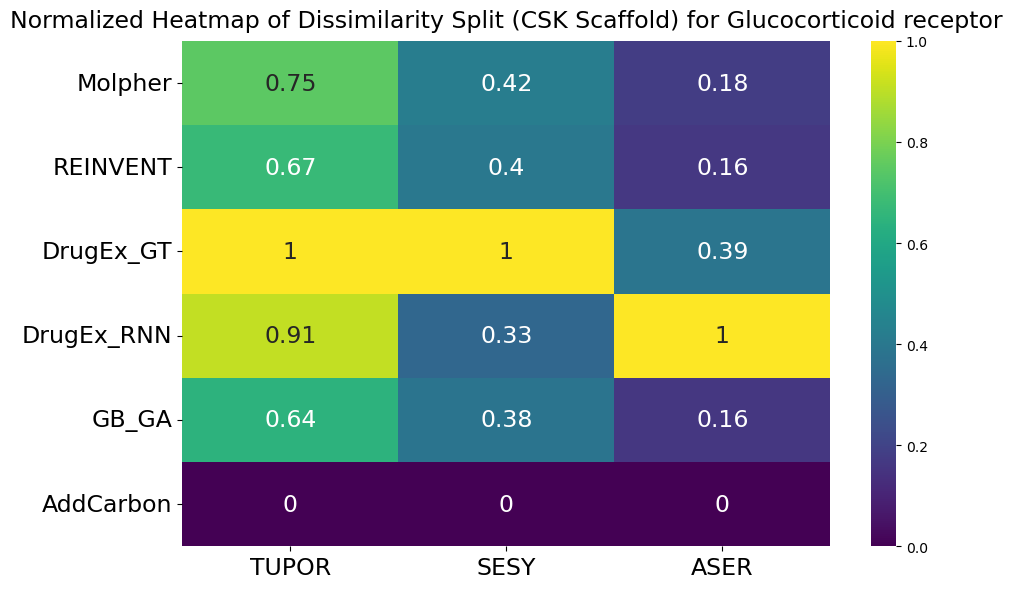

In [372]:
type_cluster = 'dis'
type_scaffold = 'csk'
subset = ''
generators_name_list = [
    f"Molpher{subset}",
    f"REINVENT{subset}",
    #f"DrugEx_GT_epsilon_0.1{subset}",
    f"DrugEx_GT_epsilon_0.6{subset}",
    #f"DrugEx_RNN_epsilon_0.1{subset}",
    f"DrugEx_RNN_epsilon_0.6{subset}",
    #f"GB_GA_mut_r_0.01{subset}",
    f"GB_GA_mut_r_0.5{subset}",
    f"addcarbon{subset}"
]
receptor = 'Glucocorticoid_receptor'
            
if subset == '':
    subset = 'base'

#For poster we need a little different colors
poster = False

if poster == True:
    colors = ["#f4b285", "#aad1fd", "#b7d59e"] 
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    name_save = f'heatmap_{type_cluster}_{type_scaffold}{subset}_poster'
else:
    cmap = 'viridis'
    name_save = f'heatmap_{type_cluster}_{type_scaffold}{subset}'


if type_scaffold == 'csk':
    type_scaffold_str =  'CSK'
elif type_scaffold == 'murcko':
    type_scaffold_str = 'Murcko'
else:
    type_scaffold_str = type_scaff
if receptor == 'Glucocorticoid_receptor':
    receptor_str = 'Glucocorticoid receptor'
elif receptor == 'Leukocyte_elastase':
    receptor_str = 'Leukocyte elastase'
else:
    receptor_str = receptor
    
if type_cluster == 'dis':
    type_cluster_str = 'Dissimilarity'
elif type_cluster == 'sim':
    type_cluster_str = 'Similarity'
    
title = f'Normalized Heatmap of {type_cluster_str} Split ({type_scaffold_str} Scaffold) for {receptor_str}'
#title = f"Heatmap for {type_cluster} split and {type_scaffold_str} scaffold for {receptor_str}"
hv.plot_heatmap(type_cluster, type_scaffold, generators_name_list, receptor, title=title, cmap = cmap, name_save=name_save, using_norm_values = True)

### Heatmap of different subsets visualized in a single plot.

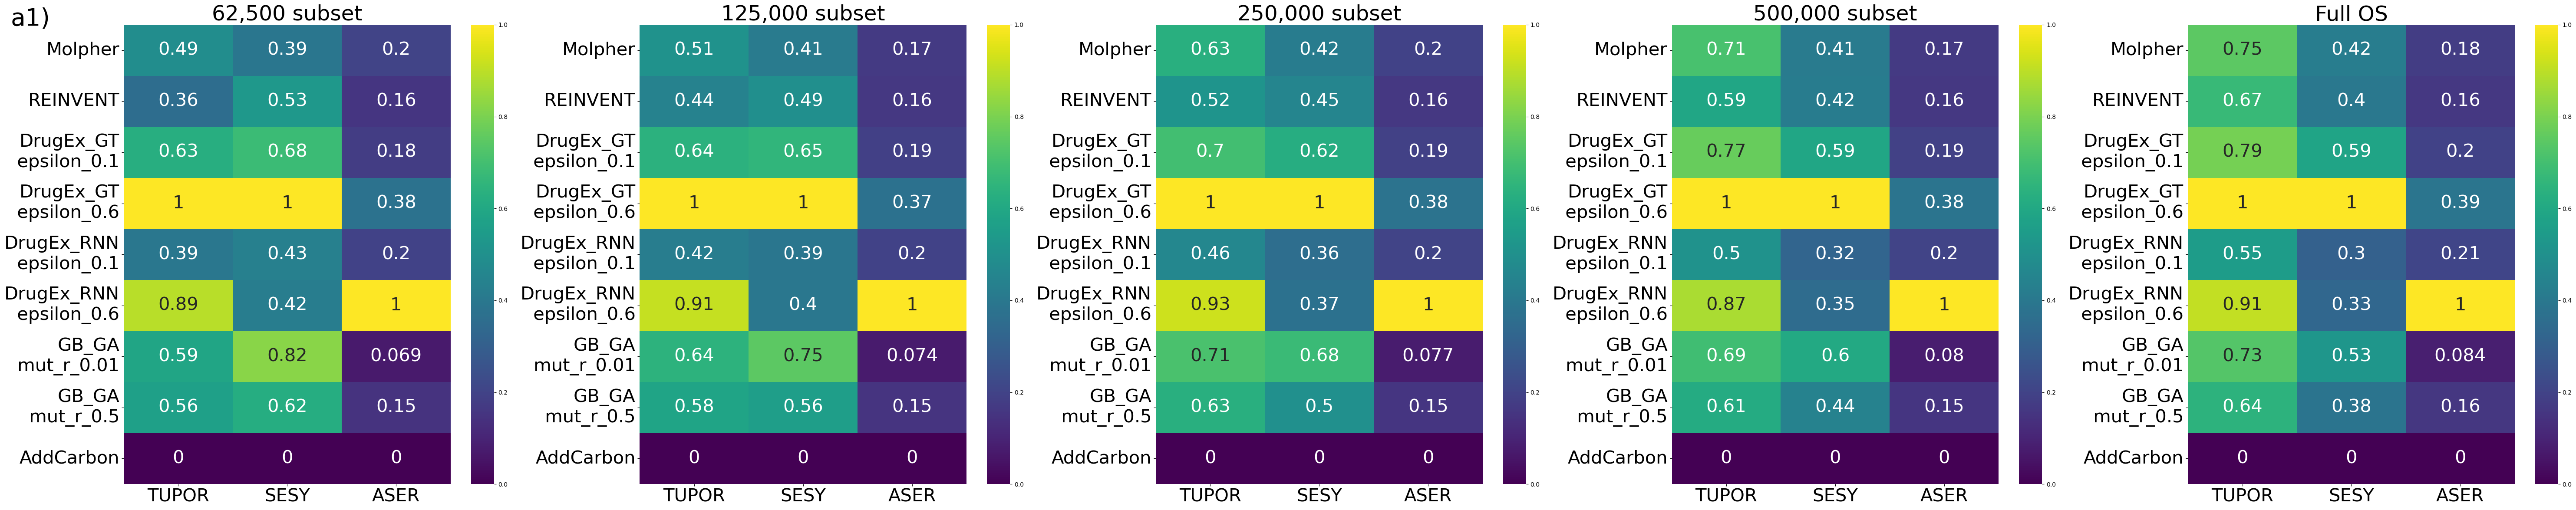

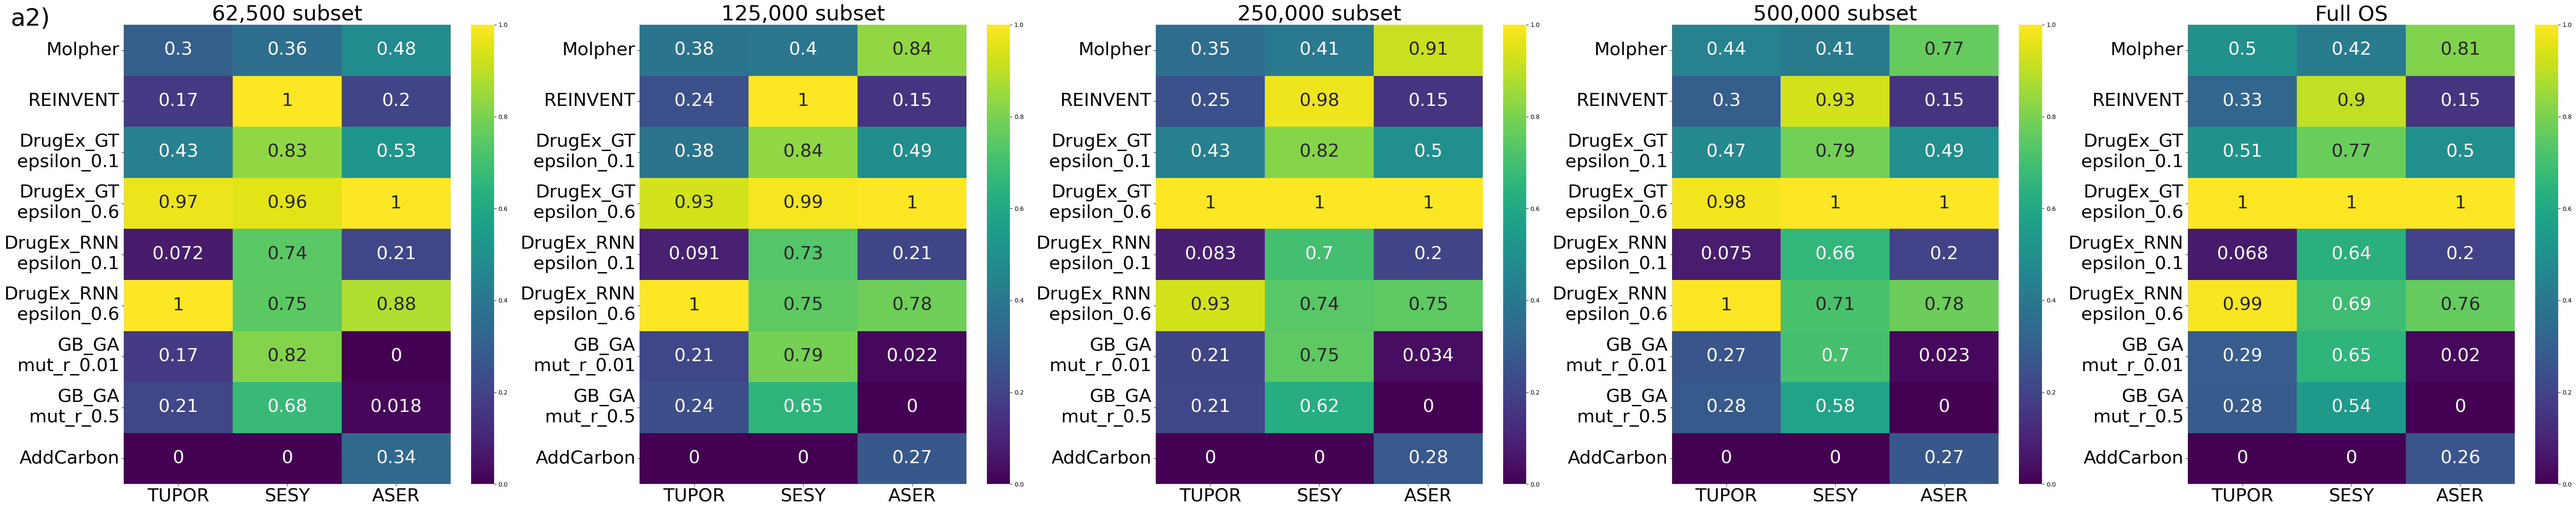

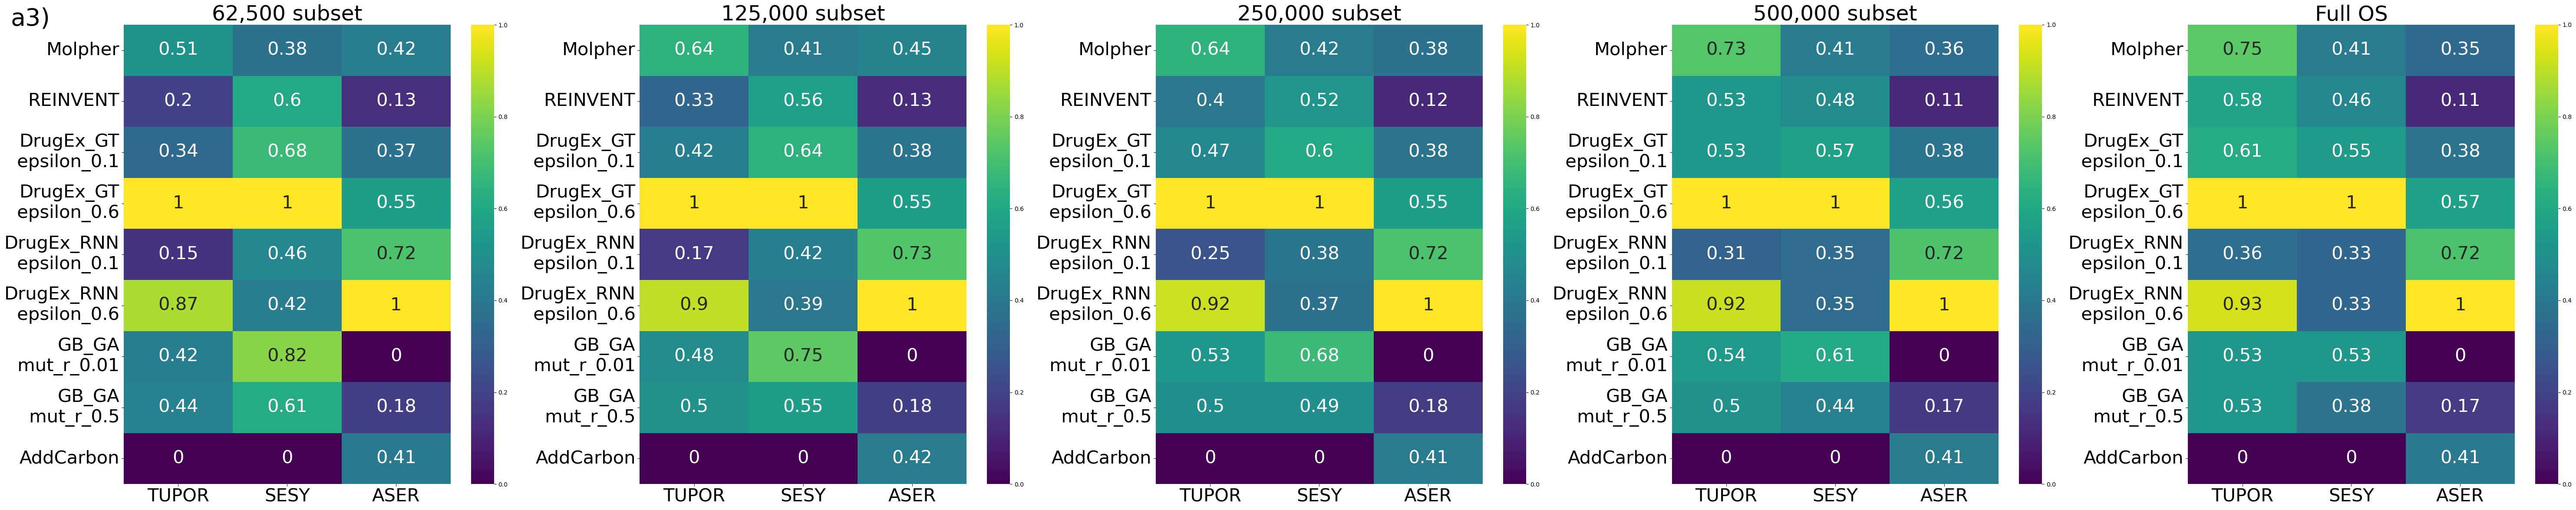

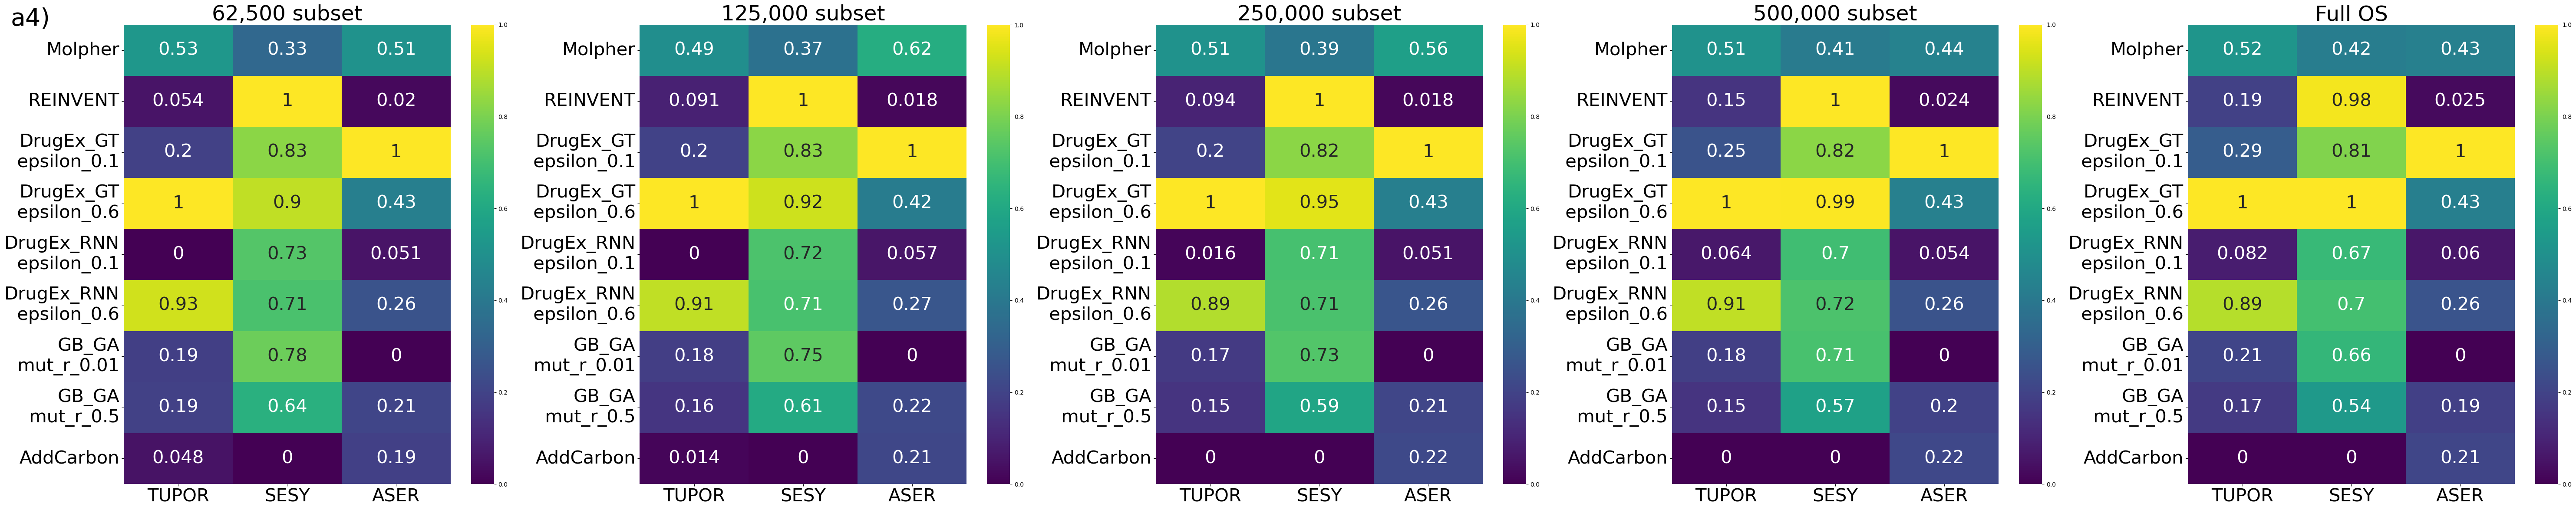

In [386]:
# Iterate through different types of splits (e.g., 'dis' and 'sim') and scaffold types (e.g., 'csk' and 'murcko')
count = 1
for type_cluster in ['dis', 'sim']:
    for type_scaffold in ['csk', 'murcko']:
        # Initialize an empty dictionary to store the data for each subset
        subset_dict = {}

        # Iterate through different subsets (base, 1k, 10k, 100k, 500k)
        for subset in ['_62.5k', '_125k', '_250k', '_500k', '']:
            receptor = 'Glucocorticoid_receptor'
            # Load the corresponding DataFrame from the CSV file based on the subset
            
            generators_name_list = [
                f"Molpher{subset}",
                f"REINVENT{subset}",
                f"DrugEx_GT_epsilon_0.1{subset}",
                f"DrugEx_GT_epsilon_0.6{subset}",
                f"DrugEx_RNN_epsilon_0.1{subset}",
                f"DrugEx_RNN_epsilon_0.6{subset}",
                f"GB_GA_mut_r_0.01{subset}",
                f"GB_GA_mut_r_0.5{subset}",
                f"addcarbon{subset}"
            ]

            using_norm_value = True #Define if use normalized values or not

            if using_norm_value:
                df = hv.preprocesing(type_cluster, type_scaffold, generators_name_list, receptor)
            else:
                df = hv.preprocesing_org(type_cluster, type_scaffold, generators_name_list, receptor)
            # Add the loaded data to the subset_dict with the subset name as the key
            subset_dict[subset] = df
        
        # Call the plot_all_subsets function to plot heatmaps for all subsets in the subset_dict
        name_save = f'5x1_heat_maps_{type_cluster}_{type_scaffold}_{receptor}'
        # The title for the heatmap figure is dynamically generated based on the scaffold type and split type

        if type_scaffold == 'csk':
            type_scaffold = 'CSK'

        num = f"a{count})"
        
        #title=f'Heatmaps for {type_scaffold} scaffolds and {type_cluster} split for {receptor.replace("_", " ")}'
        hv.plot_all_subsets(subset_dict, receptor = receptor, name_save=name_save, numering = num)
        count += 1

### Heatmaps for Compared to Baseline Data for Different Split Types and Scaffold Combinations


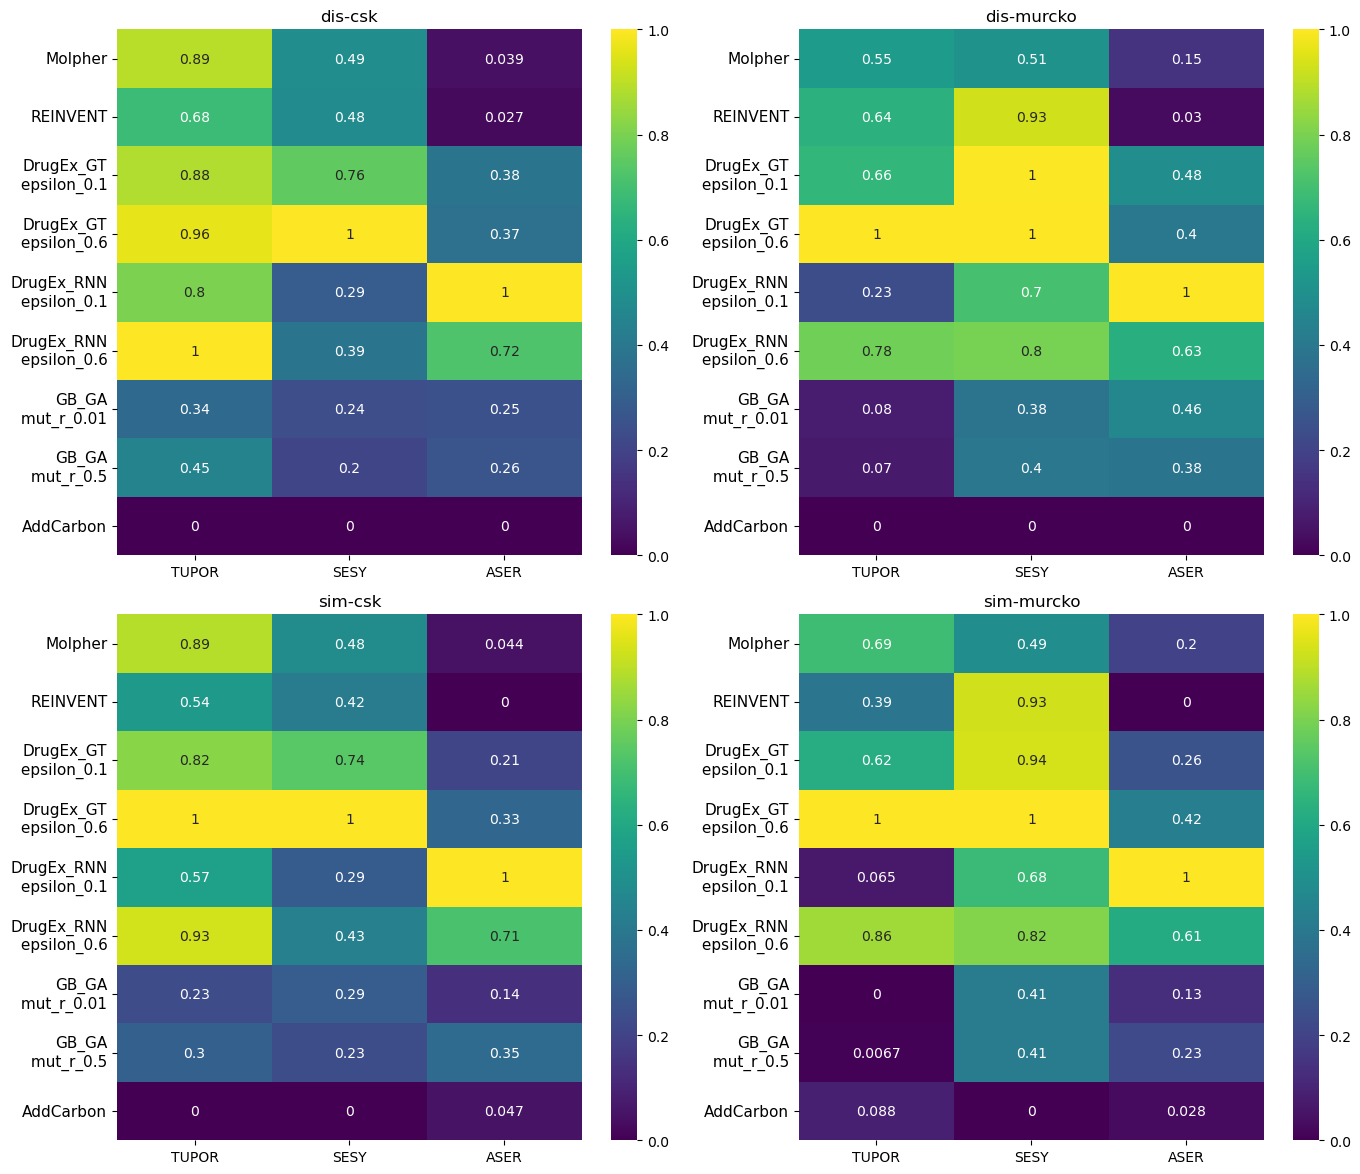

In [388]:
# Initialize empty dictionaries to store data and titles for each subset
subset_dict = {}
subset_dict_data = {}

# Iterate over the different types of splits ('dis', 'sim') and scaffold types ('csk', 'murcko')
for i, type_cluster in enumerate(['dis', 'sim']):
    for j, type_scaffold in enumerate(['csk', 'murcko']):
        receptor = 'Leukocyte_elastase'
        # Load the DataFrame for the 'base' subset from the corresponding CSV file
        # The file path is constructed dynamically based on the type_split and scaf
        generators_name_list = [
                f"Molpher",
                f"REINVENT",
                f"DrugEx_GT_epsilon_0.1",
                f"DrugEx_GT_epsilon_0.6",
                f"DrugEx_RNN_epsilon_0.1",
                f"DrugEx_RNN_epsilon_0.6",
                f"GB_GA_mut_r_0.01",
                f"GB_GA_mut_r_0.5",
                f"addcarbon"
            ]

        using_norm_value = True #Define if use normalized values or not

        if using_norm_value:
            df = hv.preprocesing(type_cluster, type_scaffold, generators_name_list, receptor)
        else:
            df = hv.preprocesing_org(type_cluster, type_scaffold, generators_name_list, receptor)
        
        # Store the loaded DataFrame in the subset_dict with a key representing its position in the grid (i,j)
        subset_dict[f'{i},{j}'] = df
        
        # Store a descriptive title for the subset in subset_dict_data (e.g., 'dis-csk', 'sim-murcko')
        subset_dict_data[f'{i},{j}'] = f'{type_cluster}-{type_scaffold}'
#colors = ["#f4b285", "#aad1fd", "#b7d59e"] 
#cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

name_save = 'heat_map_comparison_base_all_splits_paper'
# Call the plot_heatmap_base function to plot the heatmaps for all subsets in the subset_dict
# The title 'Heatmaps' will be displayed for the overall figure
#f'Heatmaps for various split types nad scaffold combination for base subset for {receptor}'
hv.plot_heatmap_base(subset_dict, subset_dict_data, title = '', receptor = receptor, name_save = name_save)


### Heatmaps for Differences Between Baseline and Other Subsets

/home/filv/.conda/envs/recall_metrics_env/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/filv/.conda/envs/recall_metrics_env/lib/python3.9/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


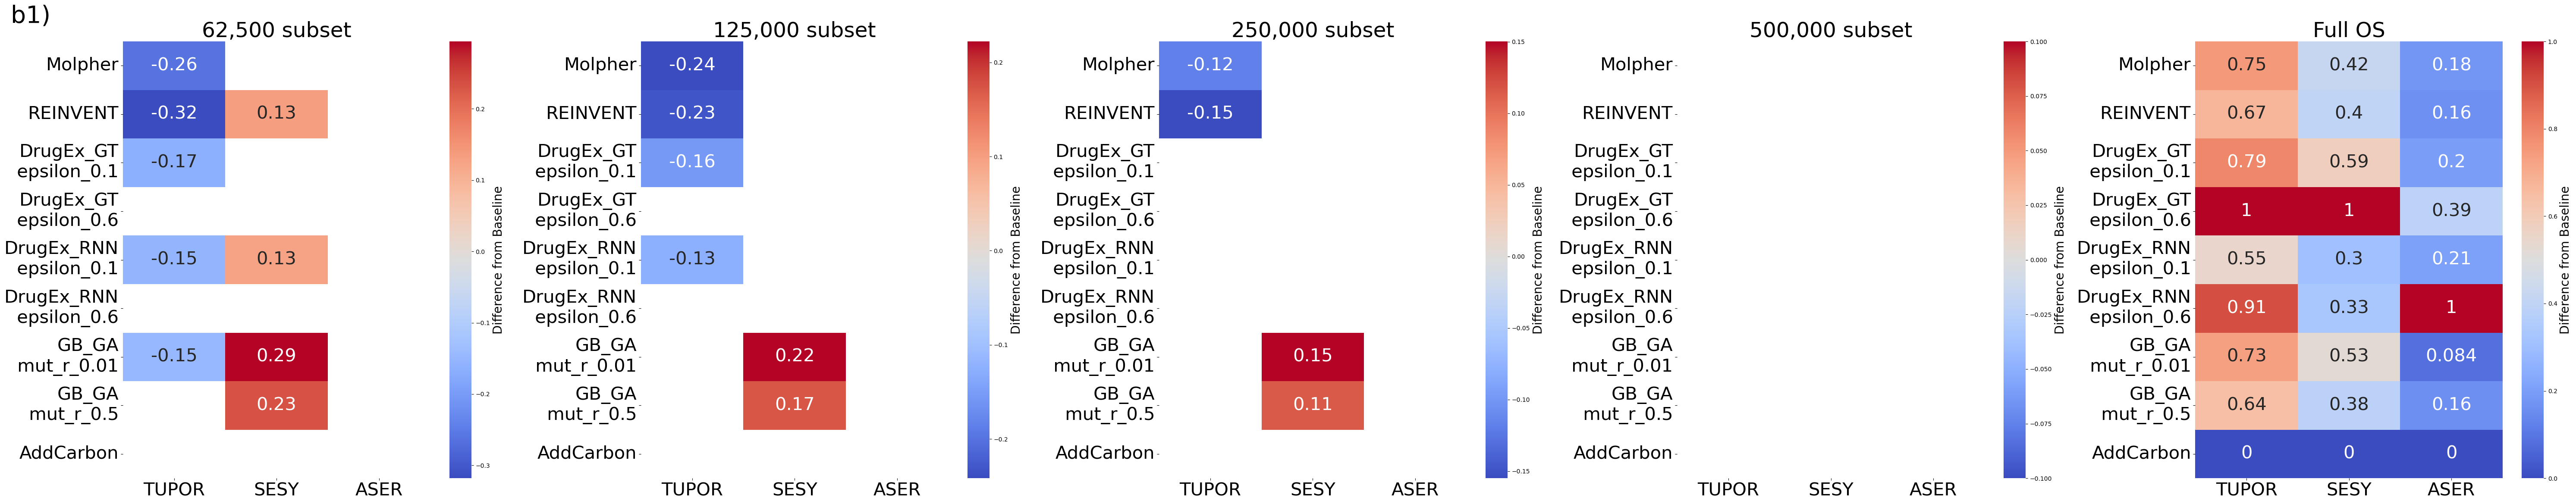

/home/filv/.conda/envs/recall_metrics_env/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/filv/.conda/envs/recall_metrics_env/lib/python3.9/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


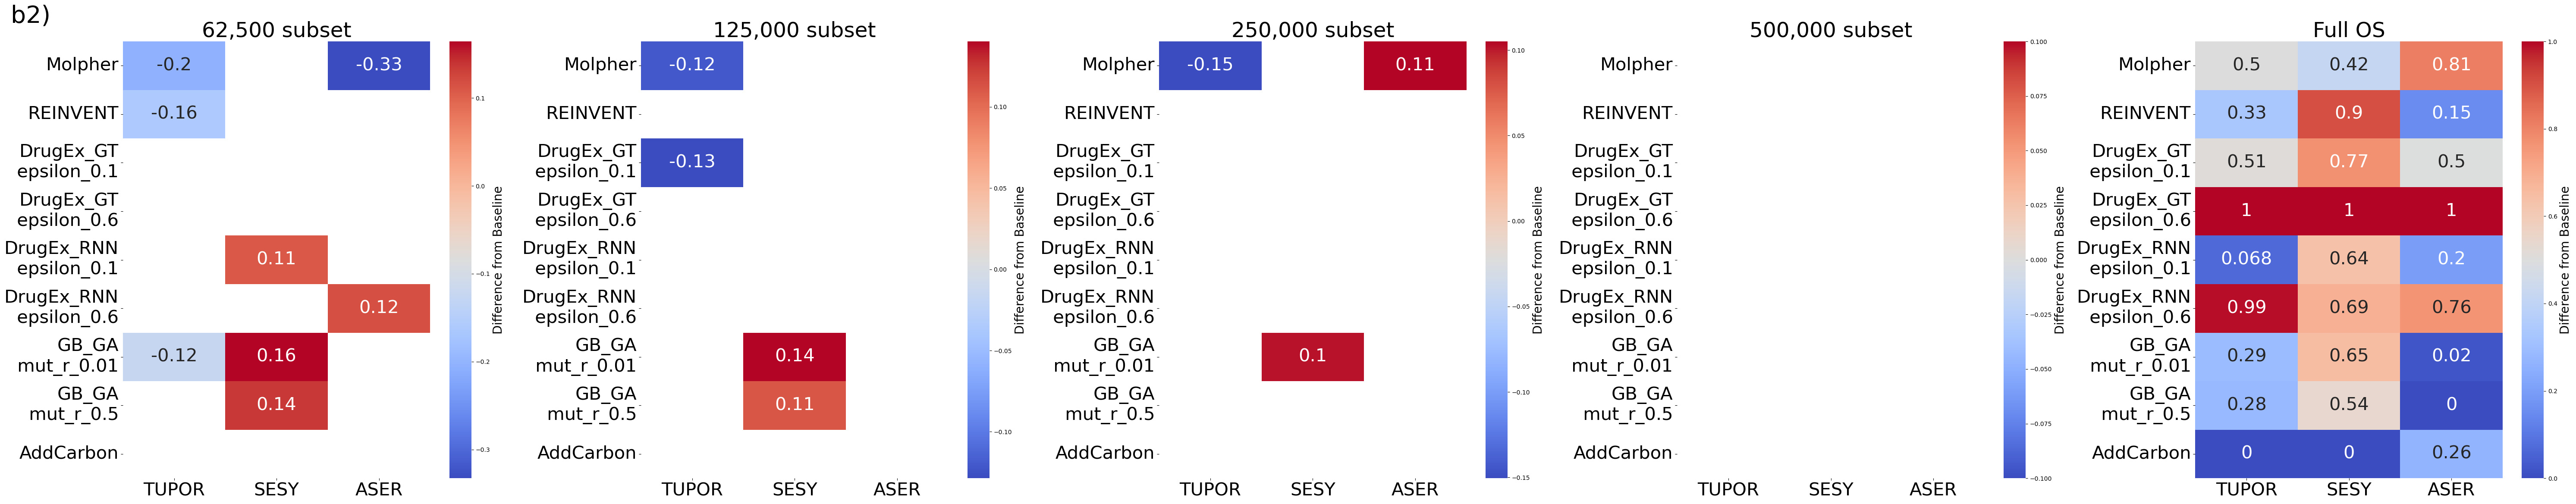

/home/filv/.conda/envs/recall_metrics_env/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/filv/.conda/envs/recall_metrics_env/lib/python3.9/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


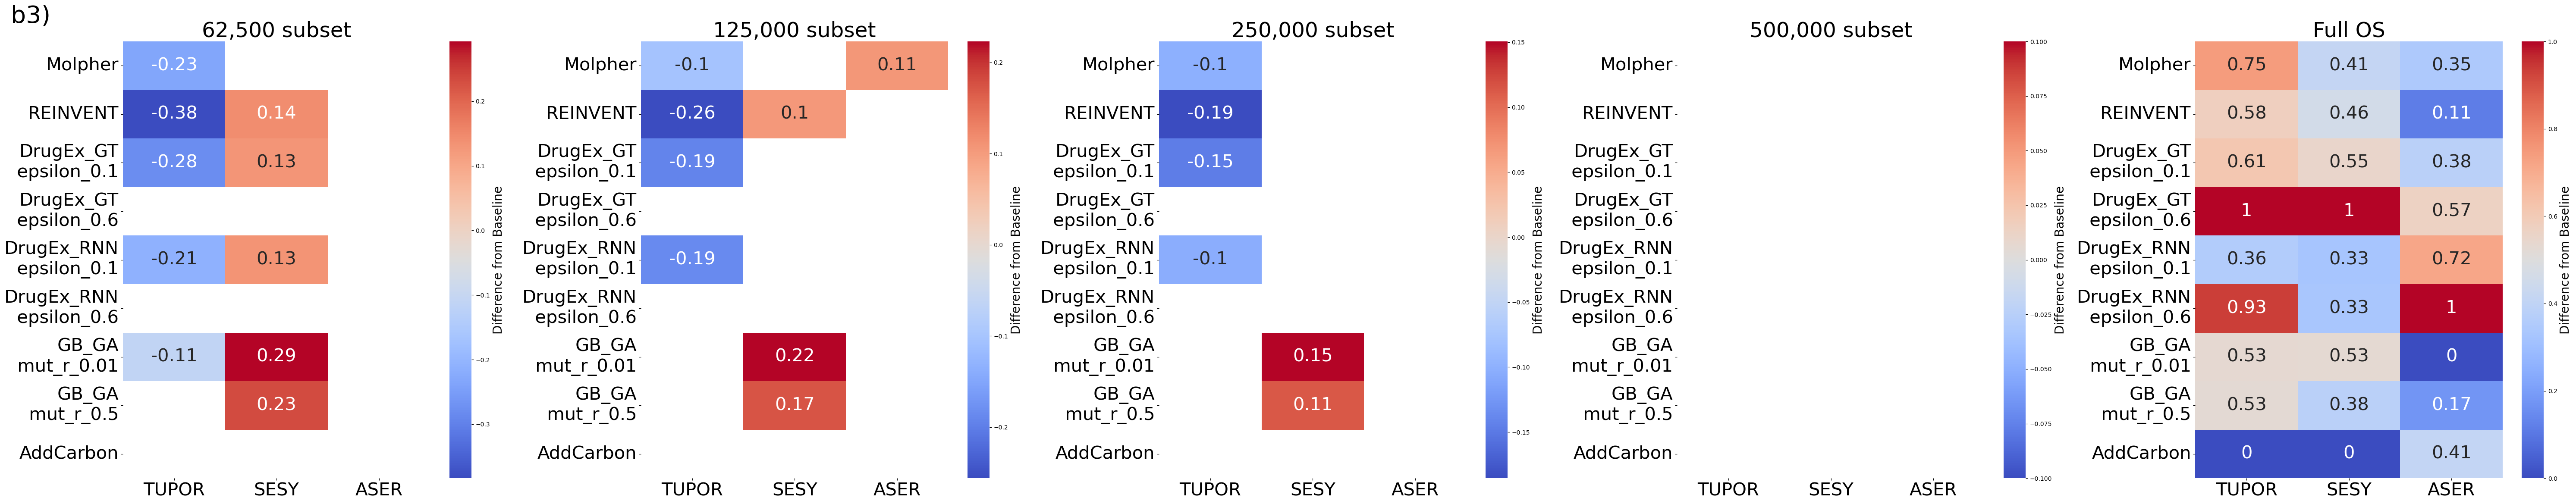

/home/filv/.conda/envs/recall_metrics_env/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/filv/.conda/envs/recall_metrics_env/lib/python3.9/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


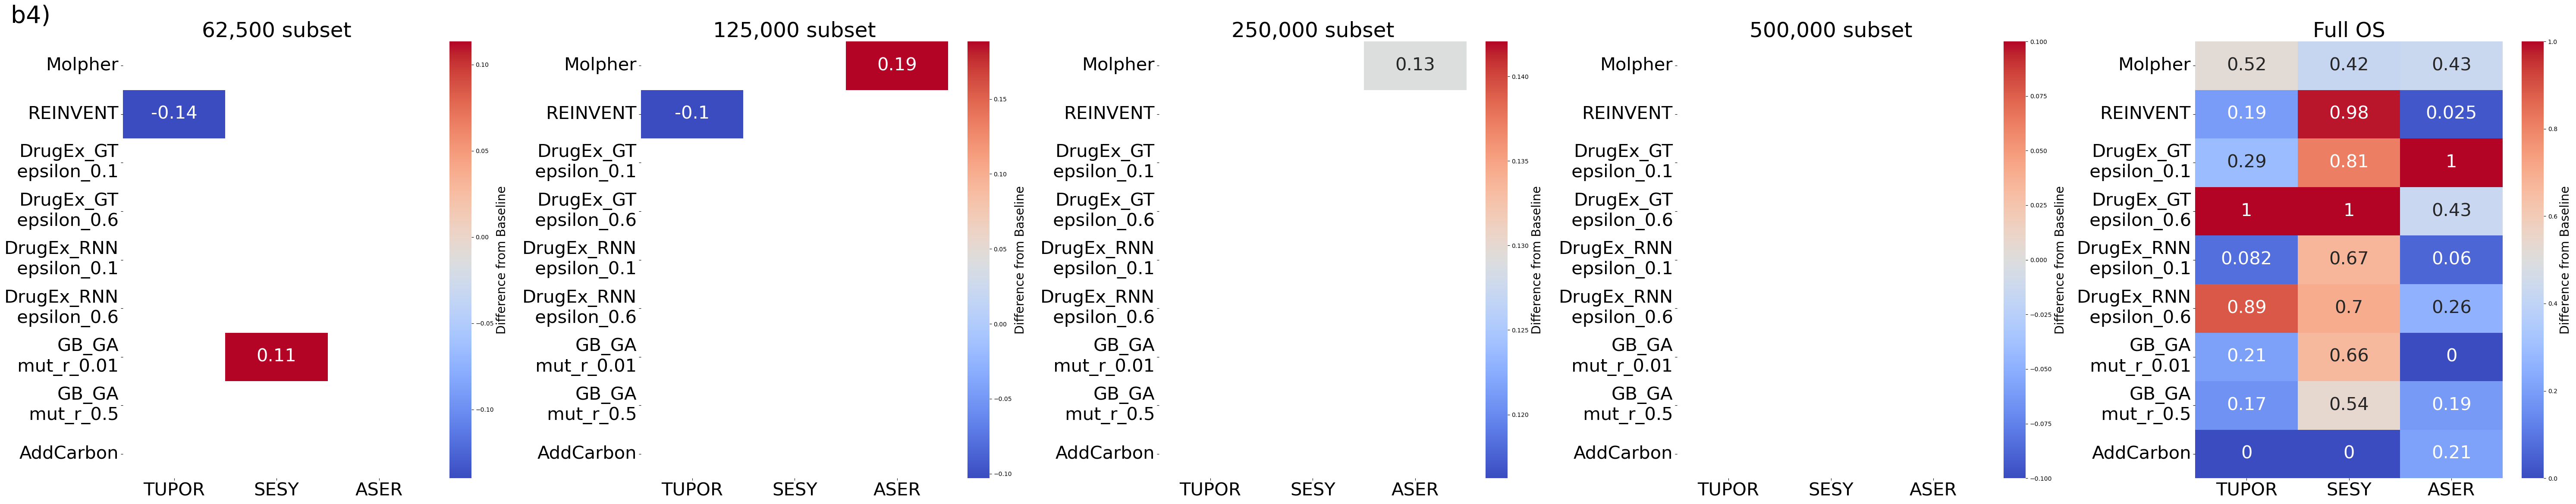

In [391]:
count = 1
for type_cluster in ['dis', 'sim']:
    for type_scaffold in ['csk', 'murcko']:
        data_dict = {}
        receptor = 'Glucocorticoid_receptor'
        # Load the baseline data (replace with your actual file paths)
        for subset in ['_62.5k', '_125k', '_250k', '_500k', '']:
            generators_name_list = [
                f"Molpher{subset}",
                f"REINVENT{subset}",
                f"DrugEx_GT_epsilon_0.1{subset}",
                f"DrugEx_GT_epsilon_0.6{subset}",
                f"DrugEx_RNN_epsilon_0.1{subset}",
                f"DrugEx_RNN_epsilon_0.6{subset}",
                f"GB_GA_mut_r_0.01{subset}",
                f"GB_GA_mut_r_0.5{subset}",
                f"addcarbon{subset}"
            ]
            
            using_norm_value = True #Define if use normalized values or not

            if using_norm_value:
                df = hv.preprocesing(type_cluster, type_scaffold, generators_name_list, receptor)
            else:
                df = hv.preprocesing_org(type_cluster, type_scaffold, generators_name_list, receptor)
            
            # Load the baseline data for the given split type and scaffold
            if subset == '': #baseline
                baseline_df = df
                
            
                
            data_dict[subset] = df
        numering = f"b{count})"
        
        name_save = f'5x1_heat_maps_{type_cluster}_{type_scaffold}_{receptor}_diff'
        # Call the function to plot heatmaps
        hv.plot_heatmaps_with_diff_from_baseline(baseline_df, data_dict, type_cluster, type_scaffold, receptor = receptor, name_save = name_save, numering = numering)
        count += 1

### Combined Heatmap for All Generators and Receptors

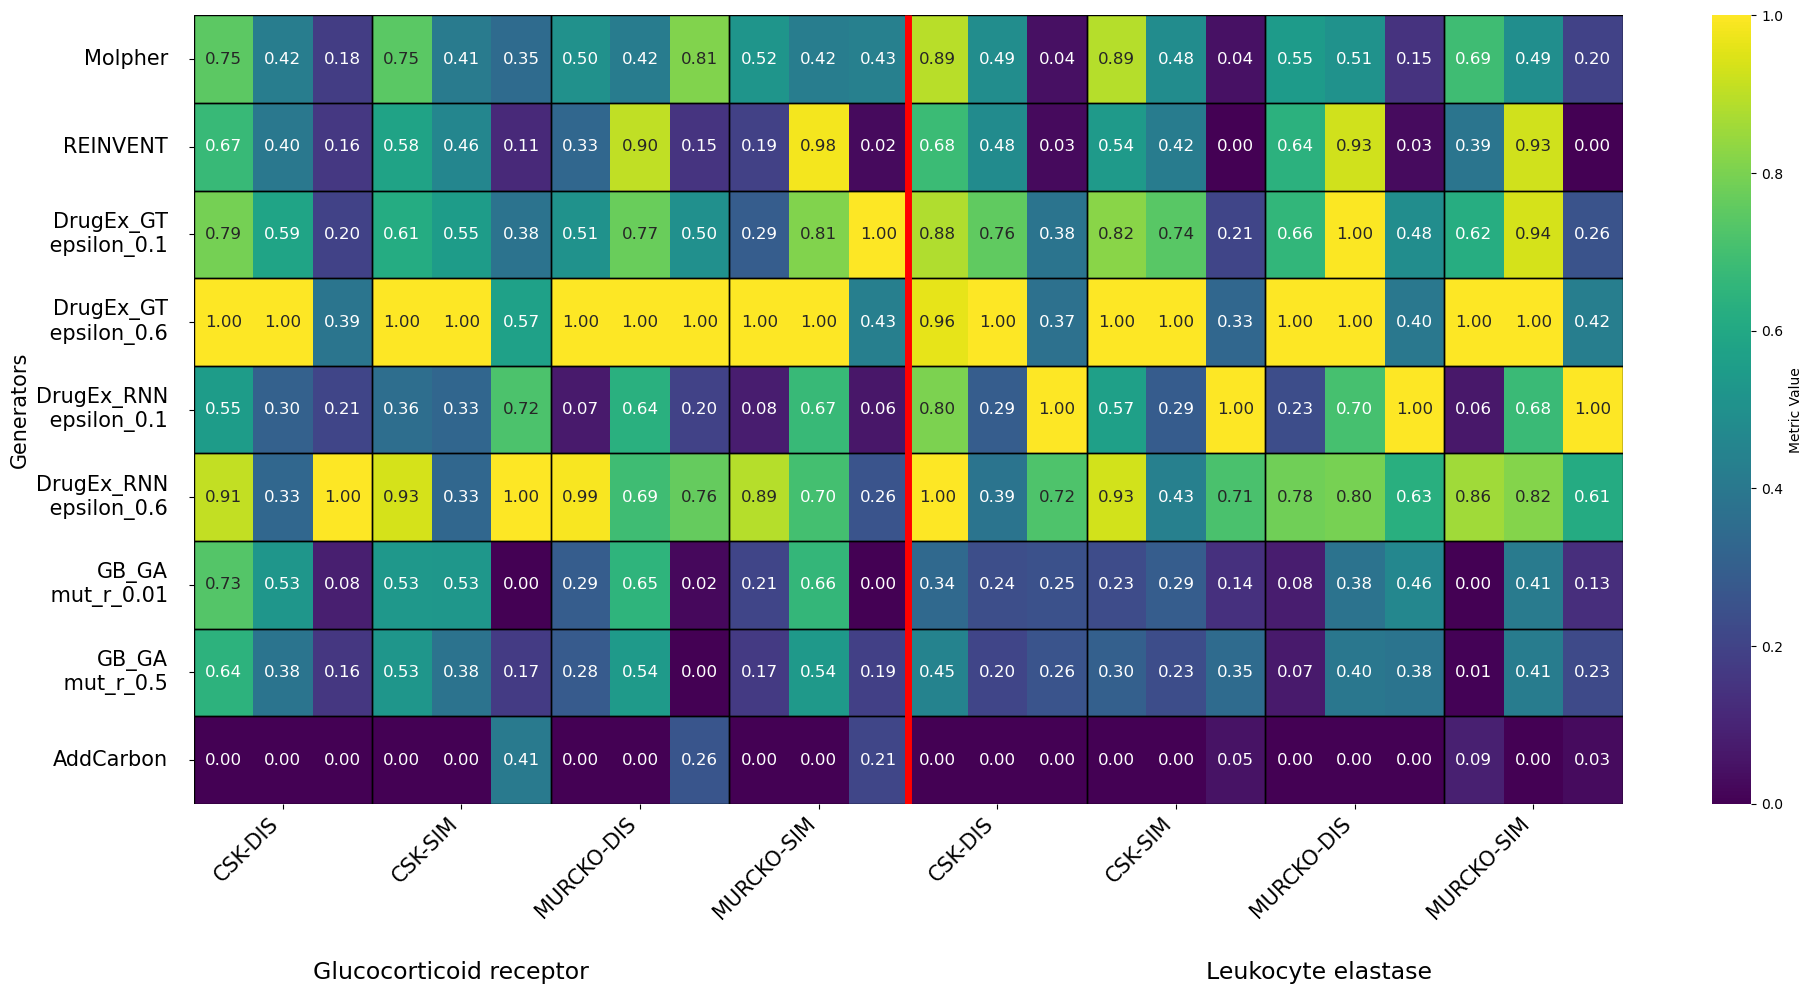

In [395]:
# All data what you want to represented in combined heatmap
generators = ['Molpher', 'REINVENT', 'DrugEx_GT_epsilon_0.1', 'DrugEx_GT_epsilon_0.6', 'DrugEx_RNN_epsilon_0.1', 'DrugEx_RNN_epsilon_0.6', 'GB_GA_mut_r_0.01', 'GB_GA_mut_r_0.5', 'addcarbon']
receptors = ['Glucocorticoid_receptor', 'Leukocyte_elastase']
scaffolds = ['csk', 'murcko']
splits = ['dis', 'sim']
metrics = ['TUPOR', 'SESY', 'ASER']

#Img will save to img/heat_map folder
hv.plot_combined_heatmap(generators,receptors,scaffolds,splits,metrics,cmap="viridis", title="", save_name="all_res_norm",using_norm_values = True)

### Combined Heatmap for All Generators and Receptors: 3 Different Heatmaps per Metric

- Define which generators, receptors, and scaffold types you want to create heatmaps for.  
- You can choose to use normalized or non-normalized data; this is controlled by the `using_norm_values` parameter.  
- Function `plot_combined_heatmap_variable_cmaps` → Creates 3 separate heatmaps for each metric. Using normalized data is recommended.  
- Function `plot_combined_heatmap_with_single_column_for_each_metric` → Each column corresponds to a single heatmap, showing different gradient shifts. Using non-normalized data is recommended.  


In [401]:
generators = ['Molpher', 'REINVENT', 'DrugEx_GT_epsilon_0.1', 'DrugEx_GT_epsilon_0.6', 'DrugEx_RNN_epsilon_0.1', 'DrugEx_RNN_epsilon_0.6', 'GB_GA_mut_r_0.01', 'GB_GA_mut_r_0.5', 'addcarbon']
receptors = ['Glucocorticoid_receptor', 'Leukocyte_elastase']
scaffolds = ['csk', 'murcko']
splits = ['dis', 'sim']
metrics = ['TUPOR', 'SESY', 'ASER']

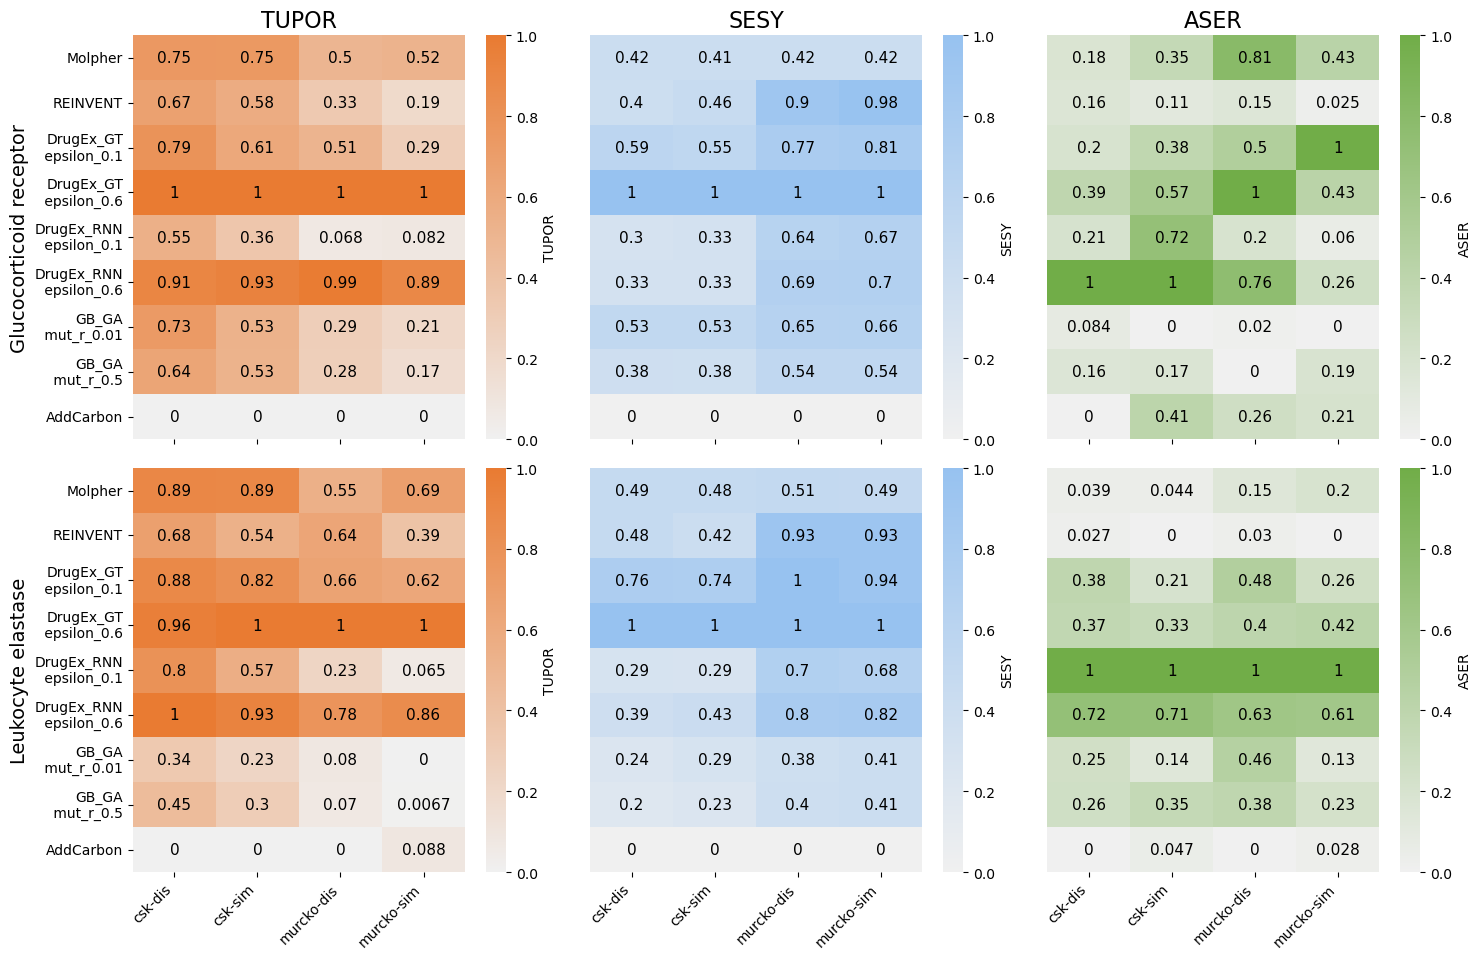

In [402]:
hv.plot_combined_heatmap_variable_cmaps(generators, receptors, scaffolds, splits, save_name="all_res_norm_dis_metrics",using_norm_values=True) 

In [419]:
generators = ['Molpher', 'REINVENT', 'DrugEx_GT_epsilon_0.1', 'DrugEx_GT_epsilon_0.6', 'DrugEx_RNN_epsilon_0.1', 'DrugEx_RNN_epsilon_0.6', 'GB_GA_mut_r_0.01', 'GB_GA_mut_r_0.5', 'addcarbon']
receptors = ['Glucocorticoid_receptor', 'Leukocyte_elastase']
scaffolds = ['csk', 'murcko']
splits = ['dis', 'sim']
metrics = ['TUPOR', 'SESY', 'ASER']

/home/filv/phd_projects/iga_2023/git_reccal/new/recall_metrics/src/heatmap_visualization.py:734: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.suptitle(title, fontsize=14, y=0.995)


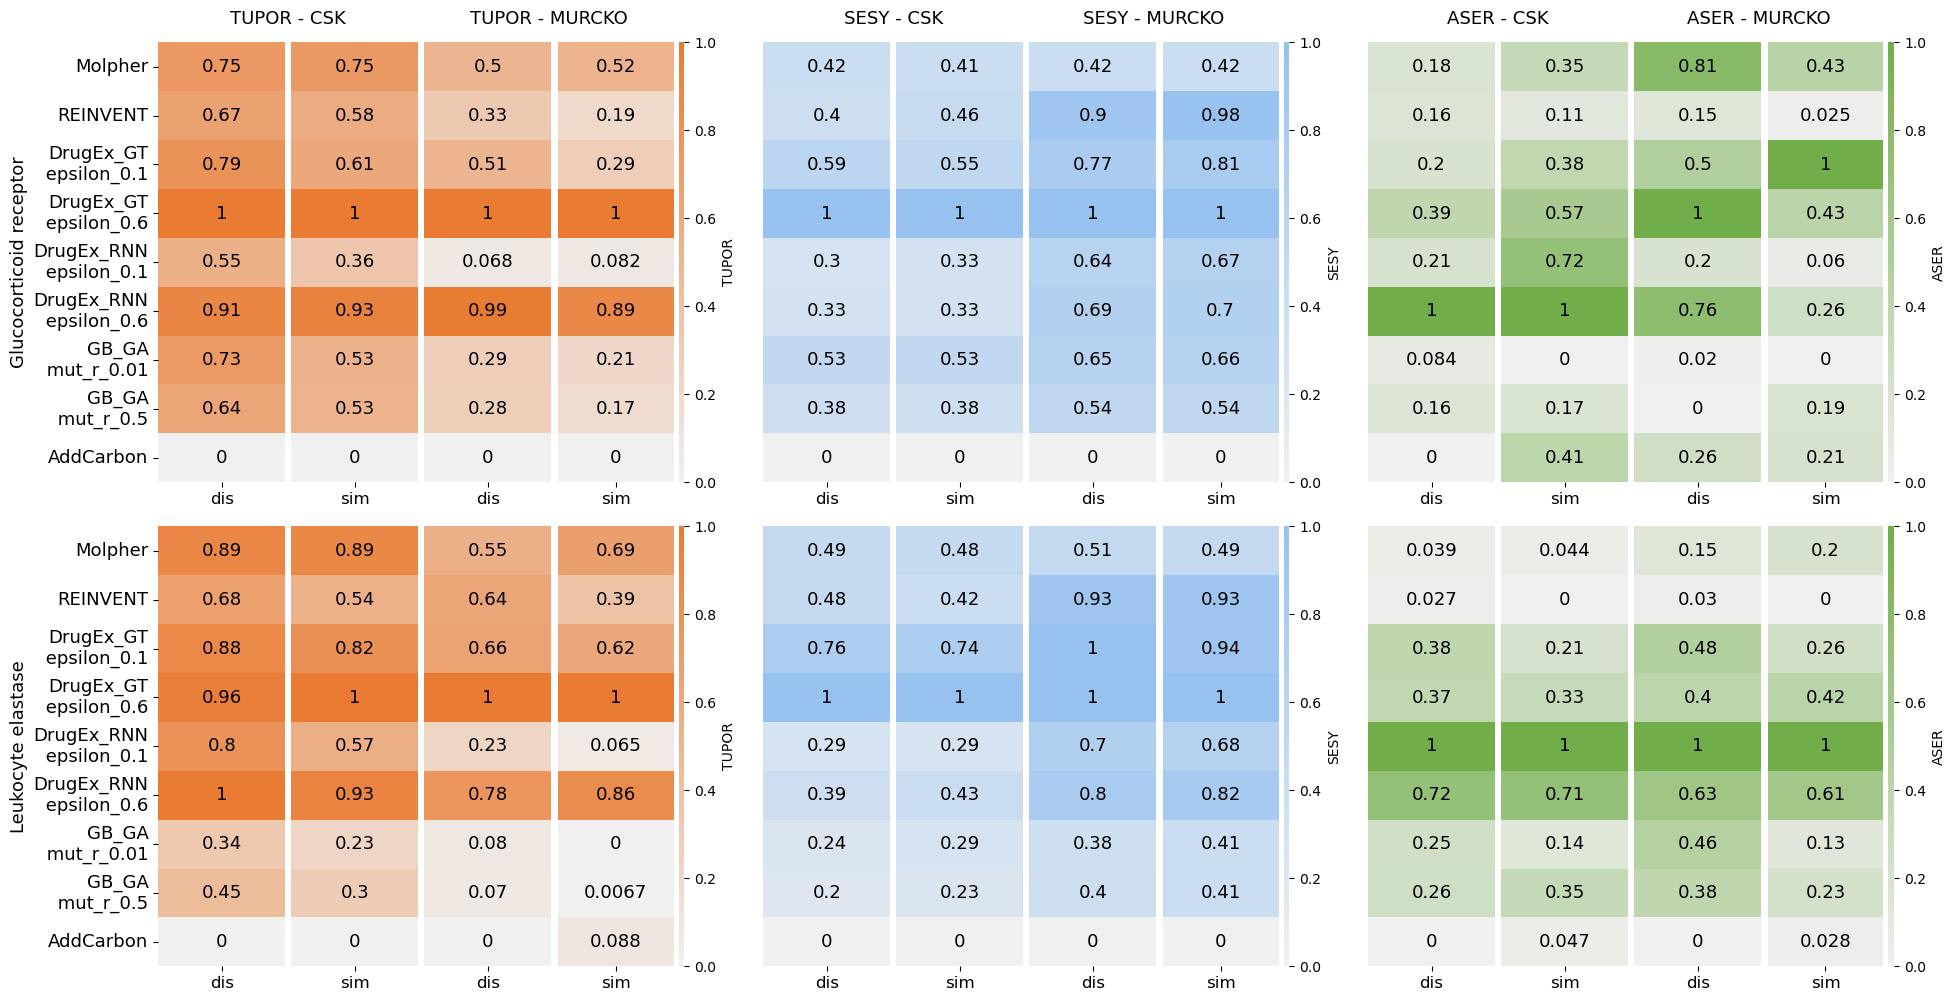

In [424]:
hv.plot_combined_heatmap_with_single_column_for_each_metric(generators, receptors, scaffolds, splits, save_name="all_res_metrics_norm_per_column",using_norm_values=True) 